In [13]:
%matplotlib inline
import urllib.request 
import json, datetime, time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [14]:
# 일별 박스오피스
def cineBoxInfo():
    #오늘 날짜를 가져와서 사용할 형식으로 만든다.
    movieDate=time.strftime('%Y%m%d', time.localtime(time.time()))
    
    cine=[]
    for i in range(0,30):
        #자료는 매일 갱신되며 갱신 시간이전에 요청시 내용이 비어 있음.
        #반복 함수 마지막에 날짜를 줄이는 함수를 사용한다.
        #str -> date
        datetime_obj = datetime.datetime.strptime(movieDate,"%Y%m%d").date()

        # 1일 혹은 1주일씩 시간을 줄여간다.
        datetime_obj_tmp = datetime_obj - datetime.timedelta(days=1)  #weeks=1
        
        #date -> str
        movieDate = datetime_obj_tmp.strftime("%Y%m%d")
        print(movieDate, end=" ")
                
        url = f"http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=66e652e1d2656b42f10d93c91e0295e4&targetDt={movieDate}"
        response =urllib.request.urlopen(url)
        #print(response)
        
        rescode = response.getcode()
        if(rescode == 200):
            responseData = response.read()

        result = json.loads(responseData)
        #print(result)
        pre_result = result["boxOfficeResult"]["dailyBoxOfficeList"]
        #print(pre_result)     
        
        for i in range(0,len(pre_result)):
            pre_result[i]['targetDt']=movieDate
            cine.append(pre_result[i])
      
    print()
    dataframe=pd.DataFrame(cine)
    print(dataframe.columns)
    dataframe.to_csv("cinebox.csv", index = False)
    return dataframe
    
# 영화상세정보
def cineInfo(movieCd):
    url = f"http://www.kobis.or.kr/kobisopenapi/webservice/rest/movie/searchMovieInfo.json?key=66e652e1d2656b42f10d93c91e0295e4&movieCd="+str(movieCd)
    response = urllib.request.urlopen(url)
    text = response.read()
    #print(text)
    d = json.loads(text)
    #print(d)
    movieInfo = d['movieInfoResult']['movieInfo']
    return movieInfo


In [15]:
cineBoxInfo()

20200324 20200323 20200322 20200321 20200320 20200319 20200318 20200317 20200316 20200315 20200314 20200313 20200312 20200311 20200310 20200309 20200308 20200307 20200306 20200305 20200304 20200303 20200302 20200301 20200229 20200228 20200227 20200226 20200225 20200224 
Index(['rnum', 'rank', 'rankInten', 'rankOldAndNew', 'movieCd', 'movieNm',
       'openDt', 'salesAmt', 'salesShare', 'salesInten', 'salesChange',
       'salesAcc', 'audiCnt', 'audiInten', 'audiChange', 'audiAcc', 'scrnCnt',
       'showCnt', 'targetDt'],
      dtype='object')


,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20199842,인비저블맨,2020-02-26,43585380,22.3,-5891160,-11.9,4409430520,5210,-694,-11.8,504363,483,1130,20200324
1,2,2,0,OLD,20192399,1917,2020-02-19,40711640,20.8,716600,1.8,6197474320,4775,104,2.2,676039,489,1024,20200324
2,3,3,0,OLD,20204791,다크 워터스,2020-03-11,19967840,10.2,748680,3.9,943203760,2460,111,4.7,108239,404,790,20200324
3,4,4,0,OLD,20193321,정직한 후보,2020-02-12,7572620,3.9,-391480,-4.9,12756431310,1297,-16,-1.2,1523417,238,390,20200324
4,5,5,0,OLD,20180962,지푸라기라도 잡고 싶은 짐승들,2020-02-19,9365900,4.8,821820,9.6,5331424090,1156,132,12.9,614216,236,374,20200324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6,6,0,OLD,20183782,기생충,2019-05-30,10504720,1.6,-14462400,-57.9,87190979685,1556,-2099,-57.4,10278802,125,262,20200224
296,7,7,0,OLD,20193911,"하이, 젝시",2020-02-19,10353000,1.6,-13528500,-56.6,185455500,1344,-1267,-48.5,23062,152,350,20200224
297,8,8,0,OLD,20197390,조조 래빗,2020-02-05,7756800,1.2,-11392380,-59.5,854406140,934,-1115,-54.4,99294,118,210,20200224
298,9,9,0,OLD,20184891,수퍼 소닉,2020-02-12,3124000,0.5,-13047160,-80.7,893288390,432,-1546,-78.2,113788,112,129,20200224


In [16]:
# 영화코드를 인자로 받아 영화상세정보 리턴
movieInfo = cineInfo(20193601)
print(movieInfo['movieCd'],
      movieInfo['movieNm'],
      movieInfo['showTm'],
      len(movieInfo['actors']),
      len(movieInfo['showTypes']))

20193601 장사리 : 잊혀진 영웅들 103 15 1


In [17]:
# 필요한 영화 코드
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
codeitem = pd.unique(df['movieCd']).tolist()
print(codeitem)   

cine=[]
for code in codeitem:
    movieInfo = cineInfo(code)
    item={'movieCd':movieInfo['movieCd'],'movieNm':movieInfo['movieNm'],'showTm':movieInfo['showTm'],'actors':len(movieInfo['actors']),'showTypes':len(movieInfo['showTypes'])}
    cine.append(item)
    
dataframe=pd.DataFrame(cine)
dataframe.to_csv("cine.csv",index = False)         

[20199842, 20192399, 20204791, 20193321, 20180962, 20192240, 20180523, 19980231, 20205096, 20135428, 20167542, 20204340, 20010238, 20192751, 19940116, 20184574, 20204681, 20196828, 20040598, 20205529, 20190864, 20193526, 20197390, 20183782, 20204546, 20182447, 20205525, 20181434, 20193911, 20184891, 20180939]


인비저블맨
Index(['rnum', 'rank', 'rankInten', 'rankOldAndNew', 'movieCd', 'movieNm',
       'openDt', 'salesAmt', 'salesShare', 'salesInten', 'salesChange',
       'salesAcc', 'audiCnt', 'audiInten', 'audiChange', 'audiAcc', 'scrnCnt',
       'showCnt', 'targetDt'],
      dtype='object')
   rnum  rank  rankInten rankOldAndNew   movieCd           movieNm  \
0     1     1          0           OLD  20199842             인비저블맨   
1     2     2          0           OLD  20192399              1917   
2     3     3          0           OLD  20204791           다크 워터스    
3     4     4          0           OLD  20193321            정직한 후보   
4     5     5          0           OLD  20180962  지푸라기라도 잡고 싶은 짐승들   

       openDt  salesAmt  salesShare  salesInten  salesChange     salesAcc  \
0  2020-02-26  43585380        22.3    -5891160        -11.9   4409430520   
1  2020-02-19  40711640        20.8      716600          1.8   6197474320   
2  2020-03-11  19967840        10.2      748680          3.9   

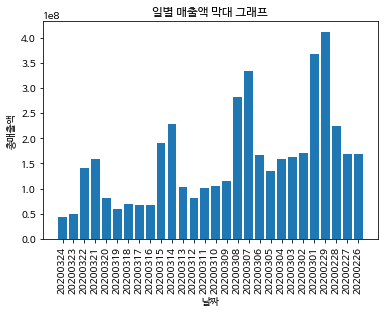

In [27]:
def graph_m(title):
    df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
    #df=df.drop('Unnamed: 0',axis=1)  # 불러온 컬럼중 제거할 컬럼이 있다면 제거한다.
    print(title)
    print(df.columns)
    print(df.head())
    temp = df[df['movieNm'] == title]
    #print(temp[['salesAmt','targetDt','movieNm']])
    #print(temp.dtypes)
    mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
    plt.bar(temp['targetDt'].astype(str),temp['salesAmt']) 
    plt.title('일별 매출액 막대 그래프')
    plt.xlabel('날짜')
    plt.ylabel('총매출액')
    plt.xticks(fontsize=10, rotation=90)
    url1="" + title + ".png"
    plt.savefig(url1)

if __name__ == "__main__":
    graph_m("인비저블맨")

In [28]:
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
df.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20199842,인비저블맨,2020-02-26,43585380,22.3,-5891160,-11.9,4409430520,5210,-694,-11.8,504363,483,1130,20200324
1,2,2,0,OLD,20192399,1917,2020-02-19,40711640,20.8,716600,1.8,6197474320,4775,104,2.2,676039,489,1024,20200324
2,3,3,0,OLD,20204791,다크 워터스,2020-03-11,19967840,10.2,748680,3.9,943203760,2460,111,4.7,108239,404,790,20200324
3,4,4,0,OLD,20193321,정직한 후보,2020-02-12,7572620,3.9,-391480,-4.9,12756431310,1297,-16,-1.2,1523417,238,390,20200324
4,5,5,0,OLD,20180962,지푸라기라도 잡고 싶은 짐승들,2020-02-19,9365900,4.8,821820,9.6,5331424090,1156,132,12.9,614216,236,374,20200324


In [31]:
temp1 = df[df['movieNm'] == '인비저블맨']
temp1.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20199842,인비저블맨,2020-02-26,43585380,22.3,-5891160,-11.9,4409430520,5210,-694,-11.8,504363,483,1130,20200324
10,1,1,0,OLD,20199842,인비저블맨,2020-02-26,49476540,25.3,-92045660,-65.0,4365845140,5904,-9534,-61.8,499153,500,1206,20200323
20,1,1,0,OLD,20199842,인비저블맨,2020-02-26,141522200,27.4,-16613920,-10.5,4316368600,15438,-1937,-11.1,493249,594,1651,20200322
30,1,1,0,OLD,20199842,인비저블맨,2020-02-26,158136120,26.2,77471380,96.0,4174846400,17375,8457,94.8,477811,593,1645,20200321
40,1,1,0,OLD,20199842,인비저블맨,2020-02-26,80664740,24.4,22324560,38.3,4016710280,8918,1965,28.3,460436,554,1400,20200320


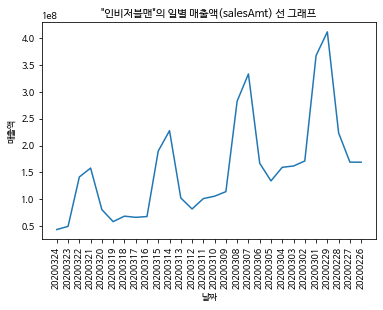

In [51]:

mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
plt.plot([str(x) for x in temp1['targetDt']], temp1['salesAmt'])
plt.title('"{}"의 일별 매출액(salesAmt) 선 그래프'.format(temp1.iloc[0,5]))
plt.xlabel('날짜')
plt.ylabel('매출액')
plt.xticks(fontsize=9, rotation=90)
plt.show()

In [52]:
temp1.iloc[0,5]

'인비저블맨'

In [53]:
temp = df.groupby('movieNm').sum()
temp

,rnum,rank,rankInten,movieCd,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
movieNm,,,,,,,,,,,,,,,,
1917,68,68,0,605771970,3567341220,589.8,-478931440,107.0,144725327670,393002,-49115,93.5,15757320,16816,45974,606008859
걸즈 앤 판처 최종장,10,10,0,20196828,8802000,2.3,8802000,100.0,8802000,1030,1030,100.0,1030,11,58,20200312
그린 북,10,10,60,20184574,2663500,1.0,2603500,4339.2,3689881360,530,518,4316.7,441993,100,159,20200316
그링고,29,29,15,60616587,19781500,4.8,4789000,336.1,94843500,3823,1061,621.3,17115,83,114,60600930
기생충,66,66,1,161470256,49923870,7.3,-21251220,-134.3,697764380070,7418,-2932,-120.7,82265185,832,1566,161602113
남산의 부장들,10,10,1,20180939,3080960,0.5,-5089720,-62.3,41209709750,382,-526,-57.9,4748387,94,135,20200224
다크 워터스,34,34,-1,282867074,937941760,209.2,19967840,154.5,8397152280,107588,2460,138.1,964680,6886,17300,282804445
더 보이 2: 돌아온 브람스,64,64,-3,161637448,180600000,26.2,18686500,135.2,1054658000,19783,1982,107.6,118797,1190,2775,161602477
메멘토,58,58,0,140071666,44831000,10.1,4223000,66.4,1150412600,8924,843,67.1,162035,798,1308,141402205


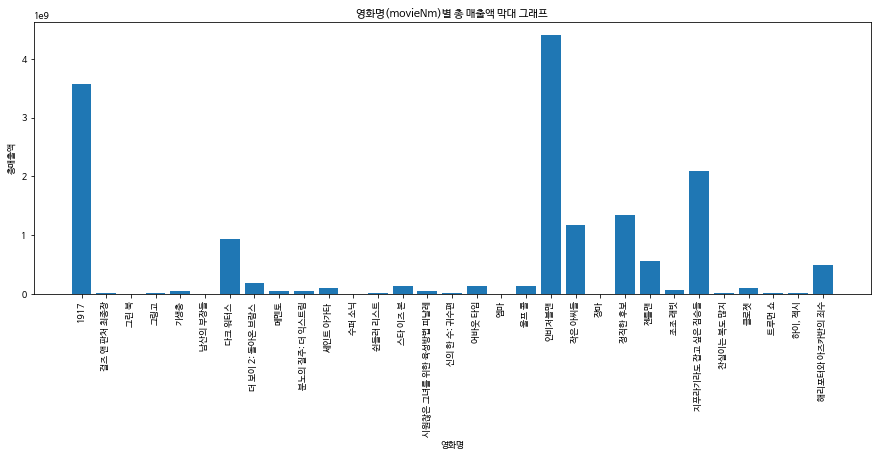

In [54]:
mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
plt.figure(figsize=(15, 5))
plt.bar(temp.index, temp['salesAmt']) 
plt.title('영화명(movieNm)별 총 매출액 막대 그래프')
plt.xlabel('영화명')
plt.ylabel('총매출액')
plt.xticks(fontsize=9, rotation=90)
plt.show()

- 분포도 그리기

In [55]:
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
temp = df.groupby('movieNm').sum()
temp.head()

,rnum,rank,rankInten,movieCd,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
movieNm,,,,,,,,,,,,,,,,
1917,68,68,0,605771970,3567341220,589.8,-478931440,107.0,144725327670,393002,-49115,93.5,15757320,16816,45974,606008859
걸즈 앤 판처 최종장,10,10,0,20196828,8802000,2.3,8802000,100.0,8802000,1030,1030,100.0,1030,11,58,20200312
그린 북,10,10,60,20184574,2663500,1.0,2603500,4339.2,3689881360,530,518,4316.7,441993,100,159,20200316
그링고,29,29,15,60616587,19781500,4.8,4789000,336.1,94843500,3823,1061,621.3,17115,83,114,60600930
기생충,66,66,1,161470256,49923870,7.3,-21251220,-134.3,697764380070,7418,-2932,-120.7,82265185,832,1566,161602113


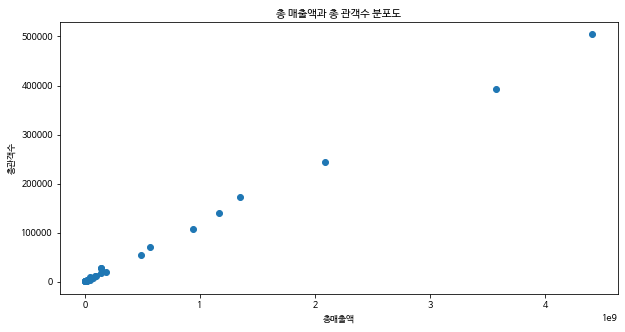

In [56]:
mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
plt.figure(figsize=(10, 5))
plt.scatter(temp['salesAmt'], temp['audiCnt']) 
plt.title('총 매출액과 총 관객수 분포도')
plt.xlabel('총매출액')
plt.ylabel('총관객수')
plt.show()

- 파이차트 그리기

In [57]:
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
temp = df.groupby('movieNm').sum()
temp = temp.sort_values(by='salesAmt', ascending=0)
temp = temp.iloc[:10]
temp

,rnum,rank,rankInten,movieCd,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
movieNm,,,,,,,,,,,,,,,,
인비저블맨,28,28,0,565595576,4409430520,729.9,43585380,247.8,76864584190,504363,5210,192.3,8865199,17466,51059,565608410
1917,68,68,0,605771970,3567341220,589.8,-478931440,107.0,144725327670,393002,-49115,93.5,15757320,16816,45974,606008859
지푸라기라도 잡고 싶은 짐승들,114,114,-4,605428860,2084528640,311.8,-632951160,-91.6,142926495250,243563,-68079,-104.1,16488580,14128,39734,606008859
정직한 후보,135,135,-1,605799630,1345636650,211.6,-376498700,-106.4,370719492410,171906,-41377,-61.8,44075999,12184,28863,606008859
작은 아씨들,159,159,-2,605767200,1168070080,187.1,-189658950,-66.6,203580025020,140165,-21032,-66.3,24162304,10618,21524,606008859
다크 워터스,34,34,-1,282867074,937941760,209.2,19967840,154.5,8397152280,107588,2460,138.1,964680,6886,17300,282804445
젠틀맨,102,102,3,282709364,561505250,70.5,28034200,1771.9,5371455750,69658,3036,2324.7,682748,5183,12814,282803881
해리포터와 아즈카반의 죄수,113,113,0,300608970,490857500,66.4,18198000,36.6,168708689500,54275,2099,9.6,27167144,660,3009,303004276
더 보이 2: 돌아온 브람스,64,64,-3,161637448,180600000,26.2,18686500,135.2,1054658000,19783,1982,107.6,118797,1190,2775,161602477


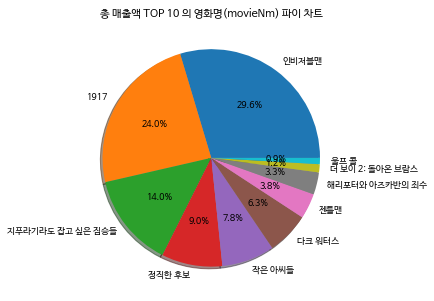

In [58]:
mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
mpl.rcParams['font.size'] = 9
plt.figure(figsize=(10, 5))
plt.pie(temp['salesAmt'], labels=temp.index, autopct='%.1f%%', shadow=True)
plt.title('총 매출액 TOP 10 의 영화명(movieNm) 파이 차트')
plt.show()

In [59]:
df1 = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
df2 = pd.read_csv(r'cine.csv',engine='python',encoding='utf-8')
df3 = pd.merge(df1, df2, on='movieCd') 
df3['rankOldAndNew'].replace(['OLD','NEW'],[0,1], inplace=True)
df3
df3=df3.loc[:,['targetDt','rank','rankOldAndNew','movieCd','salesAmt','audiCnt','showTm','actors','showTypes']]

temp = df3.corr()
temp

,targetDt,rank,rankOldAndNew,movieCd,salesAmt,audiCnt,showTm,actors,showTypes
targetDt,1.000000,0.000000,-0.124399,-0.067618,-0.244533,-0.272922,0.134562,-0.200644,-0.047223
rank,0.000000,1.000000,0.148556,-0.354299,-0.693222,-0.701822,-0.048546,0.122978,-0.107774
rankOldAndNew,-0.124399,0.148556,1.000000,-0.186360,-0.072724,-0.054350,0.029749,-0.053797,0.040441
movieCd,-0.067618,-0.354299,-0.186360,1.000000,0.218985,0.220658,-0.337366,0.114672,-0.211711
salesAmt,-0.244533,-0.693222,-0.072724,0.218985,1.000000,0.992005,0.051132,-0.126280,0.229117
audiCnt,-0.272922,-0.701822,-0.054350,0.220658,0.992005,1.000000,0.051016,-0.128440,0.212657
showTm,0.134562,-0.048546,0.029749,-0.337366,0.051132,0.051016,1.000000,0.028504,0.279663
actors,-0.200644,0.122978,-0.053797,0.114672,-0.126280,-0.128440,0.028504,1.000000,0.411493
showTypes,-0.047223,-0.107774,0.040441,-0.211711,0.229117,0.212657,0.279663,0.411493,1.000000


In [60]:
temp = temp.rename(index={'targetDt': '날짜','rank': '순위','rankOldAndNew': '신규진입여부','movieCd': '영화코드','salesAmt': '매출액','audiCnt': '관객수','showTm': '상영시간','actors': '배우 수','showTypes': '상영형태 수'})
temp = temp.rename(columns={'targetDt': '날짜','rank': '순위','rankOldAndNew': '신규진입여부','movieCd': '영화코드','salesAmt': '매출액','audiCnt': '관객수','showTm': '상영시간','actors': '배우 수','showTypes': '상영형태 수'})
temp

,날짜,순위,신규진입여부,영화코드,매출액,관객수,상영시간,배우 수,상영형태 수
날짜,1.000000,0.000000,-0.124399,-0.067618,-0.244533,-0.272922,0.134562,-0.200644,-0.047223
순위,0.000000,1.000000,0.148556,-0.354299,-0.693222,-0.701822,-0.048546,0.122978,-0.107774
신규진입여부,-0.124399,0.148556,1.000000,-0.186360,-0.072724,-0.054350,0.029749,-0.053797,0.040441
영화코드,-0.067618,-0.354299,-0.186360,1.000000,0.218985,0.220658,-0.337366,0.114672,-0.211711
매출액,-0.244533,-0.693222,-0.072724,0.218985,1.000000,0.992005,0.051132,-0.126280,0.229117
관객수,-0.272922,-0.701822,-0.054350,0.220658,0.992005,1.000000,0.051016,-0.128440,0.212657
상영시간,0.134562,-0.048546,0.029749,-0.337366,0.051132,0.051016,1.000000,0.028504,0.279663
배우 수,-0.200644,0.122978,-0.053797,0.114672,-0.126280,-0.128440,0.028504,1.000000,0.411493
상영형태 수,-0.047223,-0.107774,0.040441,-0.211711,0.229117,0.212657,0.279663,0.411493,1.000000


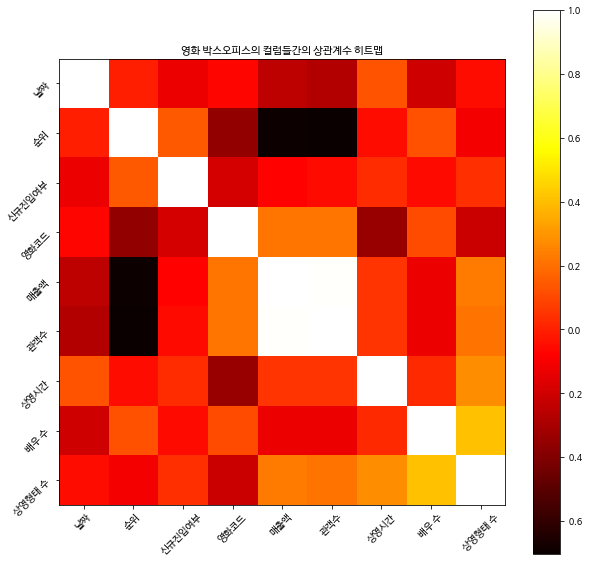

In [61]:
mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
plt.figure(figsize=(10, 10))
plt.imshow(temp, cmap='hot')
plt.colorbar()
plt.title('영화 박스오피스의 컬럼들간의 상관계수 히트맵')
#plt.xticks(range(9), ['targetDt','rank','rankOldAndNew','movieCd','salesAmt','audiCnt','showTm','actors','showTypes'])
plt.xticks(range(len(temp.columns)), temp.columns)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(range(len(temp.index)), temp.index)
plt.yticks(fontsize=10, rotation=45)
plt.show()

In [62]:
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
df.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20199842,인비저블맨,2020-02-26,43585380,22.3,-5891160,-11.9,4409430520,5210,-694,-11.8,504363,483,1130,20200324
1,2,2,0,OLD,20192399,1917,2020-02-19,40711640,20.8,716600,1.8,6197474320,4775,104,2.2,676039,489,1024,20200324
2,3,3,0,OLD,20204791,다크 워터스,2020-03-11,19967840,10.2,748680,3.9,943203760,2460,111,4.7,108239,404,790,20200324
3,4,4,0,OLD,20193321,정직한 후보,2020-02-12,7572620,3.9,-391480,-4.9,12756431310,1297,-16,-1.2,1523417,238,390,20200324
4,5,5,0,OLD,20180962,지푸라기라도 잡고 싶은 짐승들,2020-02-19,9365900,4.8,821820,9.6,5331424090,1156,132,12.9,614216,236,374,20200324


In [63]:
temp1 = df[df['movieNm'] == '인비저블맨']
temp1.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20199842,인비저블맨,2020-02-26,43585380,22.3,-5891160,-11.9,4409430520,5210,-694,-11.8,504363,483,1130,20200324
10,1,1,0,OLD,20199842,인비저블맨,2020-02-26,49476540,25.3,-92045660,-65.0,4365845140,5904,-9534,-61.8,499153,500,1206,20200323
20,1,1,0,OLD,20199842,인비저블맨,2020-02-26,141522200,27.4,-16613920,-10.5,4316368600,15438,-1937,-11.1,493249,594,1651,20200322
30,1,1,0,OLD,20199842,인비저블맨,2020-02-26,158136120,26.2,77471380,96.0,4174846400,17375,8457,94.8,477811,593,1645,20200321
40,1,1,0,OLD,20199842,인비저블맨,2020-02-26,80664740,24.4,22324560,38.3,4016710280,8918,1965,28.3,460436,554,1400,20200320


In [64]:
temp2 = df[df['movieNm'] == '1917']
temp2.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
1,2,2,0,OLD,20192399,1917,2020-02-19,40711640,20.8,716600,1.8,6197474320,4775,104,2.2,676039,489,1024,20200324
11,2,2,0,OLD,20192399,1917,2020-02-19,39995040,20.4,-72101620,-64.3,6156762680,4671,-7604,-61.9,671264,469,1009,20200323
21,2,2,0,OLD,20192399,1917,2020-02-19,112096660,21.7,-22267320,-16.6,6116767640,12275,-2363,-16.1,666593,543,1359,20200322
31,2,2,0,OLD,20192399,1917,2020-02-19,134363980,22.2,68072480,102.7,6004670980,14638,7391,102.0,654318,546,1372,20200321
41,2,2,0,OLD,20192399,1917,2020-02-19,66291500,20.1,13509060,25.6,5870307000,7247,1169,19.2,639680,501,1073,20200320


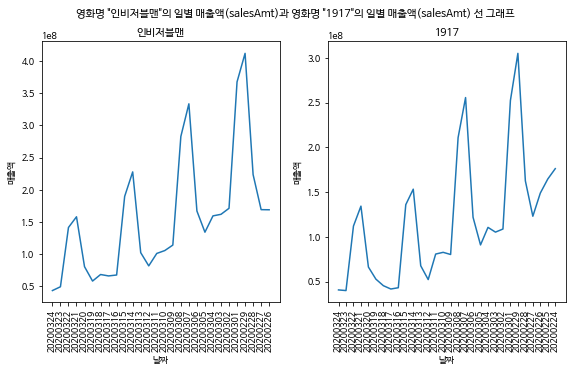

In [65]:
mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
fig = plt.figure()
fig.set_size_inches(9.4,4.8)
#분할해 그리기 시작
axe = fig.add_subplot(1,2,1) #1행(row) 2열(column)중 첫 번째 subplot
axe.plot([str(x) for x in temp1['targetDt']], temp1['salesAmt'],label='엑시트')
axe.set_title('인비저블맨')
axe.set_xlabel('날짜')
axe.set_ylabel('매출액')
for tick in axe.xaxis.get_major_ticks():
    tick.label.set_fontsize(9) 
    tick.label.set_rotation(90)
axe = fig.add_subplot(1,2,2) #1행(row) 2열(column)중 두번째 subplot
axe.plot([str(x) for x in temp2['targetDt']], temp2['salesAmt'],label='유열의 음악앨범')
axe.set_title('1917')
axe.set_xlabel('날짜')
axe.set_ylabel('매출액')
for tick in axe.xaxis.get_major_ticks():
    tick.label.set_fontsize(9) 
    tick.label.set_rotation(90)
plt.suptitle('영화명 "인비저블맨"의 일별 매출액(salesAmt)과 영화명 "1917"의 일별 매출액(salesAmt) 선 그래프')
#분할해 그리기 끝
plt.show()

In [66]:
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
df.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20199842,인비저블맨,2020-02-26,43585380,22.3,-5891160,-11.9,4409430520,5210,-694,-11.8,504363,483,1130,20200324
1,2,2,0,OLD,20192399,1917,2020-02-19,40711640,20.8,716600,1.8,6197474320,4775,104,2.2,676039,489,1024,20200324
2,3,3,0,OLD,20204791,다크 워터스,2020-03-11,19967840,10.2,748680,3.9,943203760,2460,111,4.7,108239,404,790,20200324
3,4,4,0,OLD,20193321,정직한 후보,2020-02-12,7572620,3.9,-391480,-4.9,12756431310,1297,-16,-1.2,1523417,238,390,20200324
4,5,5,0,OLD,20180962,지푸라기라도 잡고 싶은 짐승들,2020-02-19,9365900,4.8,821820,9.6,5331424090,1156,132,12.9,614216,236,374,20200324


In [67]:
temp1 = df[df['movieNm'] == '인비저블맨']
temp1.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20199842,인비저블맨,2020-02-26,43585380,22.3,-5891160,-11.9,4409430520,5210,-694,-11.8,504363,483,1130,20200324
10,1,1,0,OLD,20199842,인비저블맨,2020-02-26,49476540,25.3,-92045660,-65.0,4365845140,5904,-9534,-61.8,499153,500,1206,20200323
20,1,1,0,OLD,20199842,인비저블맨,2020-02-26,141522200,27.4,-16613920,-10.5,4316368600,15438,-1937,-11.1,493249,594,1651,20200322
30,1,1,0,OLD,20199842,인비저블맨,2020-02-26,158136120,26.2,77471380,96.0,4174846400,17375,8457,94.8,477811,593,1645,20200321
40,1,1,0,OLD,20199842,인비저블맨,2020-02-26,80664740,24.4,22324560,38.3,4016710280,8918,1965,28.3,460436,554,1400,20200320


In [68]:
temp2 = df[df['movieNm'] == '1917']
temp2.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
1,2,2,0,OLD,20192399,1917,2020-02-19,40711640,20.8,716600,1.8,6197474320,4775,104,2.2,676039,489,1024,20200324
11,2,2,0,OLD,20192399,1917,2020-02-19,39995040,20.4,-72101620,-64.3,6156762680,4671,-7604,-61.9,671264,469,1009,20200323
21,2,2,0,OLD,20192399,1917,2020-02-19,112096660,21.7,-22267320,-16.6,6116767640,12275,-2363,-16.1,666593,543,1359,20200322
31,2,2,0,OLD,20192399,1917,2020-02-19,134363980,22.2,68072480,102.7,6004670980,14638,7391,102.0,654318,546,1372,20200321
41,2,2,0,OLD,20192399,1917,2020-02-19,66291500,20.1,13509060,25.6,5870307000,7247,1169,19.2,639680,501,1073,20200320


In [69]:
dates = list(set(temp1['targetDt']) | set(temp2['targetDt']))
dates.sort()
dates

[20200224,
 20200225,
 20200226,
 20200227,
 20200228,
 20200229,
 20200301,
 20200302,
 20200303,
 20200304,
 20200305,
 20200306,
 20200307,
 20200308,
 20200309,
 20200310,
 20200311,
 20200312,
 20200313,
 20200314,
 20200315,
 20200316,
 20200317,
 20200318,
 20200319,
 20200320,
 20200321,
 20200322,
 20200323,
 20200324]

In [70]:
def apply_temp1(date):
    return dates.index(date)
temp1['x'] = temp1['targetDt'].apply(apply_temp1)
temp1.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt,x
0,1,1,0,OLD,20199842,인비저블맨,2020-02-26,43585380,22.3,-5891160,-11.9,4409430520,5210,-694,-11.8,504363,483,1130,20200324,29
10,1,1,0,OLD,20199842,인비저블맨,2020-02-26,49476540,25.3,-92045660,-65.0,4365845140,5904,-9534,-61.8,499153,500,1206,20200323,28
20,1,1,0,OLD,20199842,인비저블맨,2020-02-26,141522200,27.4,-16613920,-10.5,4316368600,15438,-1937,-11.1,493249,594,1651,20200322,27
30,1,1,0,OLD,20199842,인비저블맨,2020-02-26,158136120,26.2,77471380,96.0,4174846400,17375,8457,94.8,477811,593,1645,20200321,26
40,1,1,0,OLD,20199842,인비저블맨,2020-02-26,80664740,24.4,22324560,38.3,4016710280,8918,1965,28.3,460436,554,1400,20200320,25


In [71]:
def apply_temp2(date):
    return dates.index(date)
temp2['x'] = temp2['targetDt'].apply(apply_temp2)
temp2.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt,x
1,2,2,0,OLD,20192399,1917,2020-02-19,40711640,20.8,716600,1.8,6197474320,4775,104,2.2,676039,489,1024,20200324,29
11,2,2,0,OLD,20192399,1917,2020-02-19,39995040,20.4,-72101620,-64.3,6156762680,4671,-7604,-61.9,671264,469,1009,20200323,28
21,2,2,0,OLD,20192399,1917,2020-02-19,112096660,21.7,-22267320,-16.6,6116767640,12275,-2363,-16.1,666593,543,1359,20200322,27
31,2,2,0,OLD,20192399,1917,2020-02-19,134363980,22.2,68072480,102.7,6004670980,14638,7391,102.0,654318,546,1372,20200321,26
41,2,2,0,OLD,20192399,1917,2020-02-19,66291500,20.1,13509060,25.6,5870307000,7247,1169,19.2,639680,501,1073,20200320,25


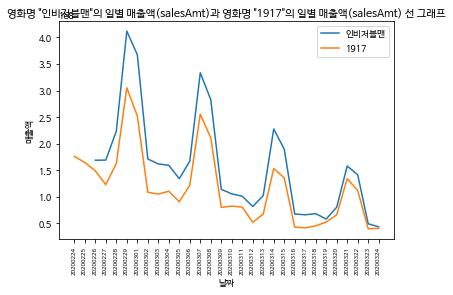

In [72]:
mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
plt.plot(temp1['x'], temp1['salesAmt'],label='인비저블맨')
plt.plot(temp2['x'], temp2['salesAmt'],label='1917')
plt.title('영화명 "인비저블맨"의 일별 매출액(salesAmt)과 영화명 "1917"의 일별 매출액(salesAmt) 선 그래프')
plt.xlabel('날짜')
plt.ylabel('매출액')
plt.xticks(range(len(dates)),dates, fontsize=6, rotation=90)
plt.legend(loc=1) #범례
plt.show()